# Исследование надежности заемщиков


**Цель:** разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Описание данных:
    
- **children** — количество детей в семье

- **days_employed** — общий трудовой стаж в днях

- **dob_years** — возраст клиента в годах

- **education** — уровень образования клиента

- **education_id** — идентификатор уровня образования

- **family_status** — семейное положение

- **family_status_id** — идентификатор семейного положения

- **gender** — пол клиента

- **income_type** — тип занятости

- **debt** — имел ли задолженность по возврату кредитов

- **total_income** — ежемесячный доход

- **purpose** — цель получения кредита

Во второй части проекта вы выполните шаги 3 и 4. Их вручную проверит ревьюер.
Чтобы вам не пришлось писать код заново для шагов 1 и 2, мы добавили авторские решения в ячейки с кодом. 



## Откройте таблицу и изучите общую информацию о данных

**Задание 1. Импортируйте библиотеку pandas. Считайте данные из csv-файла в датафрейм и сохраните в переменную `data`. Путь к файлу:**

`/datasets/data.csv`

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
pth1 = '/datasets/data.csv'
pth2 = 'https://code.s3.yandex.net/datasets/data.csv'

if os.path.exists(pth1):
    data = pd.read_csv(pth1)
elif os.path.exists(pth2):
    data = pd.read_csv(pth2)
else:
    print('Something is wrong')

**Задание 2. Выведите первые 20 строчек датафрейма `data` на экран.**

In [3]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


**Задание 3. Выведите основную информацию о датафрейме с помощью метода `info()`.**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


## Предобработка данных

### Удаление пропусков

**Задание 4. Выведите количество пропущенных значений для каждого столбца. Используйте комбинацию двух методов.**

In [5]:
data.isna().sum()
pd.DataFrame(data.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
children,0.0
days_employed,10.1
dob_years,0.0
education,0.0
education_id,0.0
family_status,0.0
family_status_id,0.0
gender,0.0
income_type,0.0
debt,0.0


**Задание 5. В двух столбцах есть пропущенные значения. Один из них — `days_employed`. Пропуски в этом столбце вы обработаете на следующем этапе. Другой столбец с пропущенными значениями — `total_income` — хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца `income_type`. Например, у человека с типом занятости `сотрудник` пропуск в столбце `total_income` должен быть заполнен медианным доходом среди всех записей с тем же типом.**

In [6]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений

**Задание 6. В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. таким артефактом будет отрицательное количество дней трудового стажа в столбце `days_employed`. Для реальных данных это нормально. Обработайте значения в этом столбце: замените все отрицательные значения положительными с помощью метода `abs()`.**

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Задание 7. Для каждого типа занятости выведите медианное значение трудового стажа `days_employed` в днях.**

In [8]:
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

У двух типов (безработные и пенсионеры) получатся аномально большие значения. Исправить такие значения сложно, поэтому оставьте их как есть.

**Задание 8. Выведите перечень уникальных значений столбца `children`.**

In [9]:
data['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5])

**Задание 9. В столбце `children` есть два аномальных значения. Удалите строки, в которых встречаются такие аномальные значения из датафрейма `data`.**

In [10]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

**Задание 10. Ещё раз выведите перечень уникальных значений столбца `children`, чтобы убедиться, что артефакты удалены.**

In [11]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5])

### Удаление пропусков (продолжение)

**Задание 11. Заполните пропуски в столбце `days_employed` медианными значениями по каждого типа занятости `income_type`.**

In [12]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

**Задание 12. Убедитесь, что все пропуски заполнены. Проверьте себя и ещё раз выведите количество пропущенных значений для каждого столбца с помощью двух методов.**

In [13]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Изменение типов данных

**Задание 13. Замените вещественный тип данных в столбце `total_income` на целочисленный с помощью метода `astype()`.**

In [14]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Задание 14. Обработайте неявные дубликаты в столбце `education`. В этом столбце есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведите их к нижнему регистру.**

In [15]:
data['education'] = data['education'].str.lower()

**Задание 15. Выведите на экран количество строк-дубликатов в данных. Если такие строки присутствуют, удалите их.**

In [16]:
data.duplicated().sum()

71

In [17]:
data = data.drop_duplicates()

### Категоризация данных

**Задание 16. На основании диапазонов, указанных ниже, создайте в датафрейме `data` столбец `total_income_category` с категориями:**

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.


**Например, кредитополучателю с доходом 25000 нужно назначить категорию `'E'`, а клиенту, получающему 235000, — `'B'`. Используйте собственную функцию с именем `categorize_income()` и метод `apply()`.**

In [18]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [19]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

**Задание 17. Выведите на экран перечень уникальных целей взятия кредита из столбца `purpose`.**

In [20]:
data['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

**Задание 18. Создайте функцию, которая на основании данных из столбца `purpose` сформирует новый столбец `purpose_category`, в который войдут следующие категории:**

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.

**Например, если в столбце `purpose` находится подстрока `'на покупку автомобиля'`, то в столбце `purpose_category` должна появиться строка `'операции с автомобилем'`.**

**Используйте собственную функцию с именем `categorize_purpose()` и метод `apply()`. Изучите данные в столбце `purpose` и определите, какие подстроки помогут вам правильно определить категорию.**

In [21]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [22]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Шаг 3. Исследуйте данные и ответьте на вопросы

#### 3.1 Есть ли зависимость между количеством детей и возвратом кредита в срок?

In [23]:
children_rating = data.groupby('children')['debt'].agg(['sum', 'count', 'mean']).reset_index()
children_rating['mean'] = children_rating['mean']*100

*Расчитал количество просроченных кредитов, общее количество кредитов и отношение просроченных кредитов к общему количеству займов по каждой категории.*

0.017814448455299798


,children,sum,count,mean
0,0,1063,14091,7.543822
1,1,444,4808,9.234609
2,2,194,2052,9.454191
3,3,27,330,8.181818
4,4,4,41,9.756098
5,5,0,9,0.000000


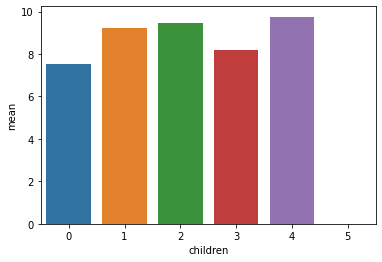

In [24]:
sns.barplot(data=children_rating, x='children', y='mean')
children_rating_sum = children_rating['count'].sum() 
children_rating_s = (330+41+9)/children_rating_sum
print (children_rating_s)
children_rating

*Построил диаграмму для наглядности показателей.*

**Вывод: В категориях от 3 до 5 детей суммарное количество кредитов меньше 2% от общего количества, поэтому рассматривать эти категории не будем. Больше всего кредитов берут заемщики без детей и возвращают их стабильнее, процент просрочек в этой категории 7.5%, что почти на 2% ниже, чем в двух других категориях. Категории заемщиков с 1 и 2-мя детьми имеют почти одинаковый процент просрочек 9.23% и 9.45%.** 

#### 3.2 Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [25]:
family_status_rating = data.groupby('family_status')['debt'].agg(['sum', 'count', 'mean']).reset_index()
family_status_rating['mean'] = family_status_rating['mean']*100
family_status_rating

,family_status,sum,count,mean
0,Не женат / не замужем,273,2796,9.763948
1,в разводе,84,1189,7.064760
2,вдовец / вдова,63,951,6.624606
3,гражданский брак,385,4134,9.313014
4,женат / замужем,927,12261,7.560558


,family_status,sum,count,mean
0,Не женат / не замужем,273,2796,9.763948
1,в разводе,84,1189,7.064760
2,вдовец / вдова,63,951,6.624606
3,гражданский брак,385,4134,9.313014
4,женат / замужем,927,12261,7.560558


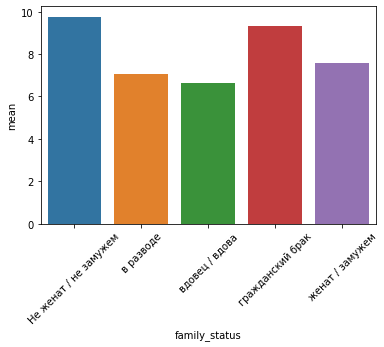

In [26]:
sns.barplot(data=family_status_rating, x='family_status', y='mean')
plt.xticks(rotation=45)
family_status_rating

*Построил диаграмму для наглядности показателей.*

 **Вывод:
 В худшую сторону выделяются категории "Не женат / не замужем" и "гражданский брак", в них просрочки почти на 2% выше, относительно ближайшей к ним категории "женат / замужем" (7,56%). Самая ненадежная категория "Не женат / не замужем" в ней процент просрочек 9.76%. Чаще всего выплачивают кредит вовремя заемщики из категории "вдовец / вдова".** 

#### 3.3 Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [27]:
income_rating = data.groupby('total_income_category')['debt'].agg(['sum', 'count', 'mean']).reset_index()
income_rating['mean'] = income_rating['mean']*100

*Расчитал количество просроченных кредитов, общее количество кредитов и отношение просроченных кредитов к общему количеству займов по каждой категории.*

,total_income_category,sum,count,mean
0,A,2,25,8.000000
1,B,354,5014,7.060231
2,C,1353,15921,8.498210
3,D,21,349,6.017192
4,E,2,22,9.090909


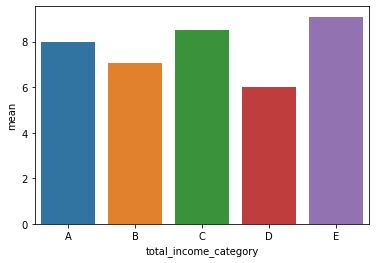

In [28]:
sns.barplot(data=income_rating, x='total_income_category', y='mean')
income_rating

*Построил диаграмму для наглядности показателей.*

**Вывод: Больше всего кредитов берут заемщики из "средней" категории "С" с доходом от 50 до 200 т.р., в этой же категории самый высокий процент просрочек -  8.5%, что на 1.5% выше чем в второй учитываемой категории "B" (7.06%). Остальные 3 категории мы не сравниваем, так как общее количество займов в них не превышает 1% от всех кредитов.**

#### 3.4 Как разные цели кредита влияют на его возврат в срок?

In [29]:
purpose_category_rating = data.groupby('purpose_category')['debt'].agg(['sum', 'count', 'mean']).reset_index()
purpose_category_rating['mean'] = purpose_category_rating['mean']*100

*Расчитал количество просроченных кредитов, общее количество кредитов и отношение просроченных кредитов к общему количеству займов по каждой категории.*

,purpose_category,sum,count,mean
0,операции с автомобилем,400,4279,9.347978
1,операции с недвижимостью,780,10751,7.255139
2,получение образования,369,3988,9.252758
3,проведение свадьбы,183,2313,7.911803


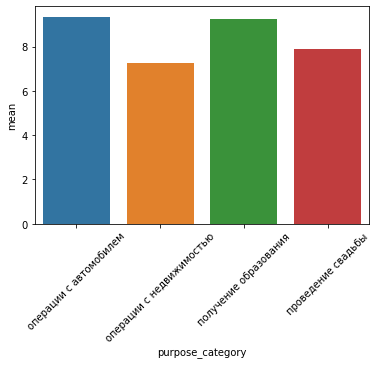

In [30]:
sns.barplot(data=purpose_category_rating, x='purpose_category', y='mean')
plt.xticks(rotation=45)
purpose_category_rating

*Построил диаграмму для наглядности показателей.*

**Вывод: Чаще остальных допускают просрочку кредитов, взятых в категориях "операции с автомобилем" и "получение образования": 9.34% и 9.25%. Самая надежная категория - "операции с недвижимостью", в ней процент просрочек составил всего 7.25%.** 

#### 3.5 Приведите возможные причины появления пропусков в исходных данных.

*Ответ: В таблице пропуски были в столбцах с трудовым стажем и доходом. Это может быть связано с отсутствием дохода/стажа. Так же это может быть человеческий фактор, какие-то данный могли пропустить.* 

#### 3.6 Объясните, почему заполнить пропуски медианным значением — лучшее решение для количественных переменных.

*Ответ: В данных могут быть аномалии, расчет среднего арифметического может исказить общую картину и повлиять на результат исследования.* 

### Шаг 4: общий вывод.

Перед поиском ответов на поставленные вопросы, потребовалось обработать данные в начальной. Были выполнены следующие действия:
    
1. В столбцах с доходами (total_income) и трудовым стажем (days_employed) были пропуски, их заполнил медианными значениями        по типу занятости
    
2. Были аномальные значения количества детей (children), строки с этими значениями удалил, так как их было крайне мало.
    
3. Для удобства анализа были добавлены новые категории по уровню дохода и цели кредита.
   
    
В результате анализа были сделаны следующие выводы:
    
1. Зависимость от количества детей есть. Заемщики без детей берут кредиты чаще и отдают чаще без просрочек, чем заемщики с     одним-двумя детьми. Заемщиков с количеством детей от 3 до 5 не рассматривал, так как их суммарное количество меньше 2%.
    
2. Чаще допускают просрочку заемщики состоящие или состоявшие в браке, максимальный процент просрочек по этим категориям       7.6%, в то время как в категориях "Не женат / не замужем" и "гражданский брак" просрочку допускают 9.8% и 9.3%.
    
3. По уровню дохода больше всего кредитов берут заемщики из "средней" категории "С" с доходом от 50 до 200 т.р., в этой же     категории самый высокий процент просрочек -  8.5%, что на 1.5% выше чем в второй учитываемой категории "B" (7.06%).             Остальные 3 категории мы не сравниваем, так как общее количество займов в них не превышает 1% от всех кредитов.
    
4. В зависимости от цели кредита чаще остальных допускают просрочку кредитов, взятых в категориях "операции с автомобилем"     и "получение образования": 9.34% и 9.25%. Самая надежная категория - "операции с недвижимостью", в ней процент просрочек       составил всего 7.25%.
